<a href="https://colab.research.google.com/github/Dipak9699-ds/FlyTheNest/blob/main/Bike_Sharing_Demand_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

$\color{red}{\text{Bike Sharing Demand Prediction}}$




# **Project Summary -**

The goal of this project is to develop a machine learning model to predict the demand for bike sharing. The dataset used for this project contains various features related to weather conditions, date and time, and other factors that may influence bike rental demand.

Overall, the bike sharing demand prediction project aimed to provide an accurate and reliable model to forecast the bike rental demand, which can be beneficial for bike sharing companies or city planners in optimizing bike availability and improving operational efficiency.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
%matplotlib inline

### Load Dataset

In [2]:
# Load Dataset
bike_df = pd.read_csv('SeoulBikeData.csv', encoding ='latin')

### Dataset First View

In [3]:
# Dataset First Look
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(bike_df.shape)

(8760, 14)


### Dataset Information

In [5]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Check Duplicate Values

In [6]:
# Dataset Duplicate or Non Duplicate Value Count
bike_df.duplicated().value_counts()

,count
False,8760


In [7]:
# Dataset Duplicate Value Count
len(bike_df[bike_df.duplicated()])

0

### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

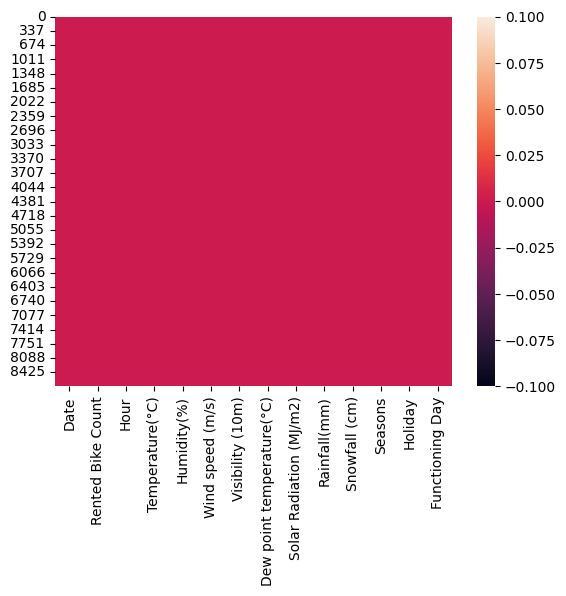

In [9]:
# Visualizing the missing values
sns.heatmap(bike_df.isnull())

The above dataset has 8760 rows and 14 columns. There are no mising values and duplicate values in the dataset.

### Check Columns List

In [10]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Describe Dataset

In [11]:
# Dataset Describe
bike_df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.000000,704.602055,644.997468,0.000000,191.000000,504.500000,1065.250000,3556.000000
Hour,8760.000000,11.500000,6.922582,0.000000,5.750000,11.500000,17.250000,23.000000
Temperature(°C),8760.000000,12.882922,11.944825,-17.800000,3.500000,13.700000,22.500000,39.400000
Humidity(%),8760.000000,58.226256,20.362413,0.000000,42.000000,57.000000,74.000000,98.000000
Wind speed (m/s),8760.000000,1.724909,1.036300,0.000000,0.900000,1.500000,2.300000,7.400000
Visibility (10m),8760.000000,1436.825799,608.298712,27.000000,940.000000,1698.000000,2000.000000,2000.000000
Dew point temperature(°C),8760.000000,4.073813,13.060369,-30.600000,-4.700000,5.100000,14.800000,27.200000
Solar Radiation (MJ/m2),8760.000000,0.569111,0.868746,0.000000,0.000000,0.010000,0.930000,3.520000
Rainfall(mm),8760.000000,0.148687,1.128193,0.000000,0.000000,0.000000,0.000000,35.000000
Snowfall (cm),8760.000000,0.075068,0.436746,0.000000,0.000000,0.000000,0.000000,8.800000


### Variables Description

*   Date : Date (year-month-day)
*   Rented Bike count : Count of bikes rented at each hour
*   Hour : Hour of the day (0-23)
*   Temperature : Temperature of the day (in celsius)
*   Humidity : Humidity measure (in %)
*   Windspeed : Windspeed (m/s)
*   Visibility : Visibility measure (10m)
*   Dew point temperature : Dew point temperature measure (in celsius)
*   Solar radiation : Solar radiation (MJ/m2)
*   Rainfall : Rainfall measure (in mm)
*   Snowfall : Snowfall measure (in cm)
*   Seasons : Winter, Spring, Summer, Autumn
*   Holiday : Weather a holiday or not
*   Functional Day : Weather a functional day or not











### Check unique values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in bike_df.columns:
  print("No. of unique values in ",i,"is",bike_df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


In [13]:
# Check Unique Values for each variable.
for column in bike_df.columns:
  print(str(column) + ' : ' + str(bike_df[column].unique()))
  print('____________________________________________')

Date : ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 '1

### Changing column name

In [14]:
# Rename the complex columns name
bike_df = bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [15]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### Breaking date column & create a new column weekdays_weekend

In [16]:
# Convert the "Date" column to datetime format
import datetime as dt
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [17]:
# Changing the "Date" column into three "year", "month", "day" column
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [18]:
# Creating a new column of "weekdays_weekend" and drop the column "Date", "day", "year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [19]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [20]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int32  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [21]:
bike_df['weekdays_weekend'].value_counts()

,count
weekdays_weekend,
0,6264
1,2496


### Changing data type

In [22]:
# Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [23]:
# Let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [24]:
# Dataset is ready to analysis.
# Create a copy of the current dataset and assigning to bike_df1
bike_df1 = bike_df.copy()

### Manipulations have I done and insights I found?

* First of all change the column names and give proper names to all column.
* Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.
* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.
* As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

### Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

#### Chart - 1

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

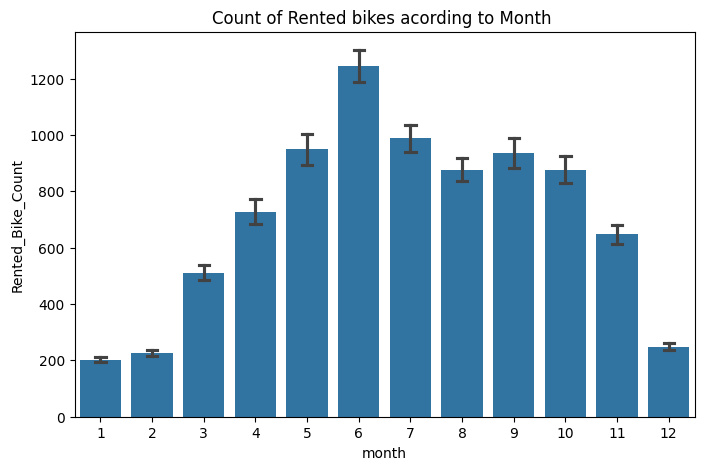

In [25]:
# Chart - 1 visualization code

# Anlysis of data by vizualisation
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=bike_df, x='month', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the count of most bookings made by the agent that's why I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.

#### Chart - 2

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday')]

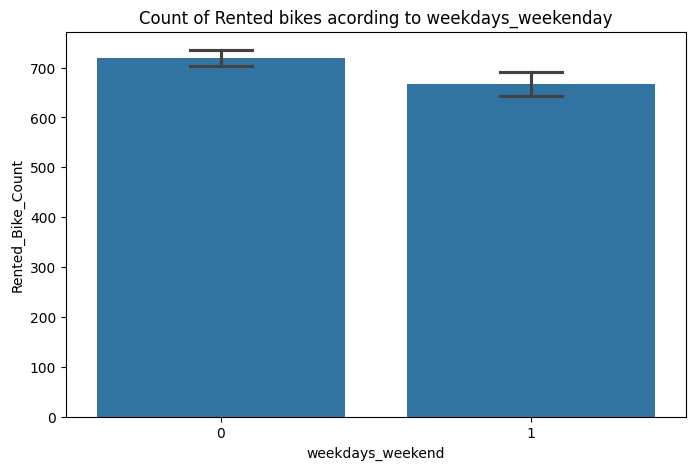

In [26]:
# Chart - 2 visualization code
# Analysis of data by vizualisation
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=bike_df, x='weekdays_weekend', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the count of most bookings made by the agent that's why I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.

#### Chart - 3

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend')]

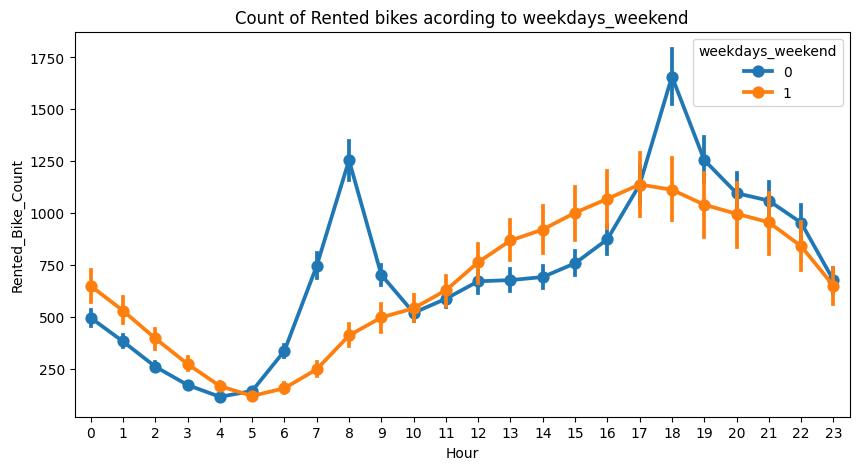

In [27]:
# Chart - 3 visualization code
# Analysis of data by vizualisation
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=bike_df, x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend')

##### 1. Why did you pick the specific chart?

A point plot is a categorical plot that displays the mean value (or another statistical estimate) and confidence intervals for different categories. It is commonly used to compare the relationship between a categorical variable and a numeric variable across different groups or levels.

##### 2. What is/are the insight(s) found from the chart?

From the above point plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.

#### Chart - 4

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour')]

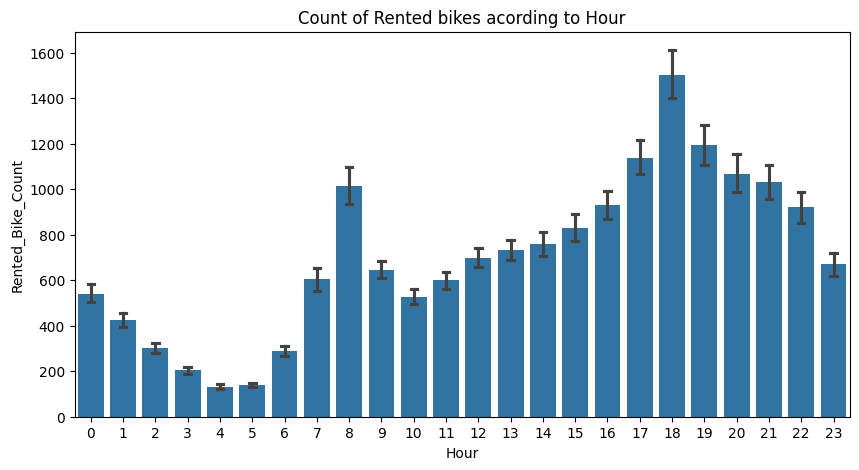

In [28]:
# Chart - 4 visualization code
# Analysis of data by vizualisation
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=bike_df, x='Hour', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the count of most bookings made by the agent that's why I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

In the above plot which shows the use of rented bike according the hours and the data are from all over the year.

Generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.

#### Chart - 5

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day')]

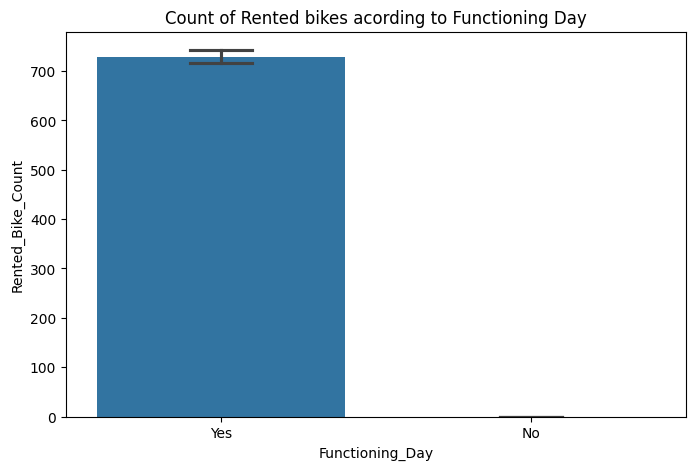

In [29]:
# Chart - 5 visualization code
# Analysis of data by vizualisation
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=bike_df, x='Functioning_Day', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the count of most bookings made by the agent that's why I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

In the above bar plot which shows the use of rented bike in functioning day or not, and it clearly shows that, People don't use rented bikes in no functioning day.

#### Chart - 6

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day')]

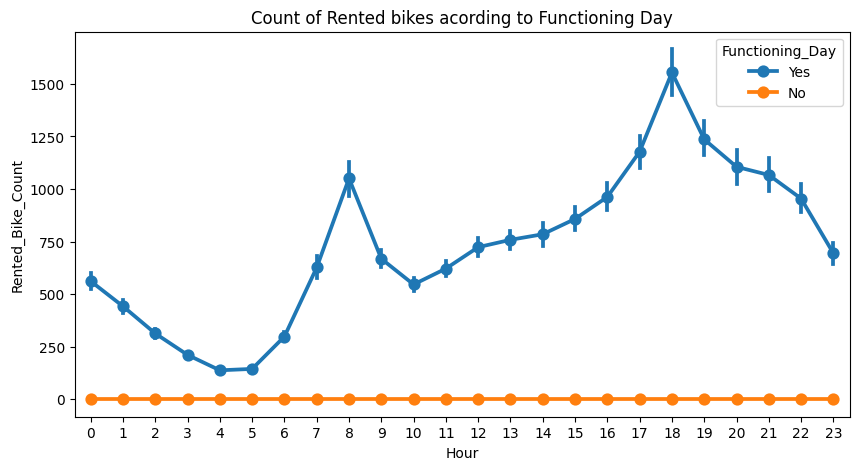

In [30]:
# Chart - 6 visualization code
# Analysis of data by vizualisation
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='Functioning_Day', ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day')

##### 1. Why did you pick the specific chart?

A point plot is a categorical plot that displays the mean value (or another statistical estimate) and confidence intervals for different categories. It is commonly used to compare the relationship between a categorical variable and a numeric variable across different groups or levels.

##### 2. What is/are the insight(s) found from the chart?

In the above point plot which shows the use of rented bike in functioning day or not, and it clearly shows that, People don't use rented bikes in no functioning day.

#### Chart - 7

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons')]

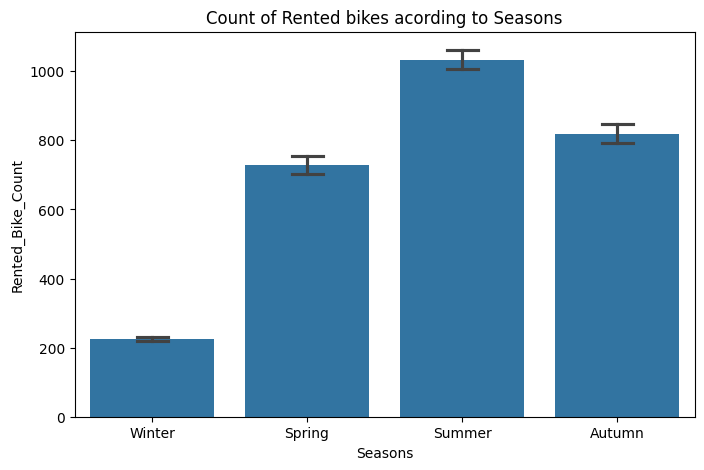

In [31]:
# Chart - 7 visualization code
# Analysis of data by vizualisation
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=bike_df, x='Seasons', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the count of most bookings made by the agent that's why I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

In the above bar plot which shows the use of rented bike in in four different seasons, and it clearly shows that, In summer season the use of rented bike is high.

#### Chart - 8

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons')]

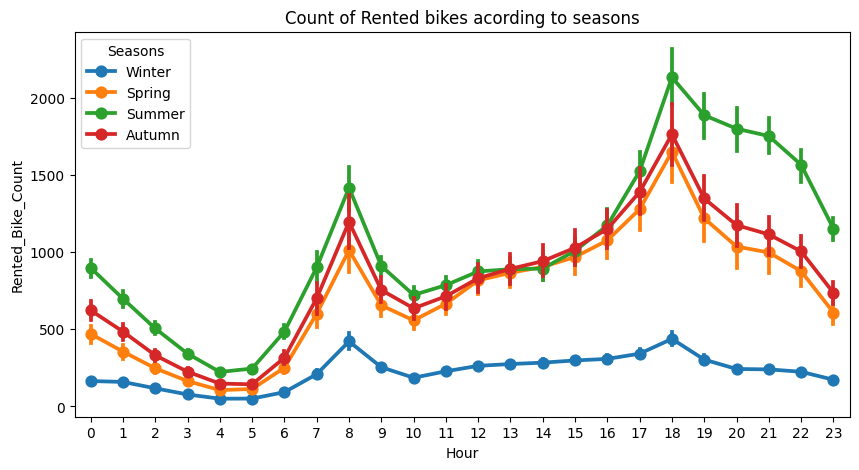

In [32]:
# Chart - 8 visualization code
# Analysis of data by vizualisation
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='Seasons', ax=ax)
ax.set(title='Count of Rented bikes acording to seasons')

##### 1. Why did you pick the specific chart?

A point plot is a categorical plot that displays the mean value (or another statistical estimate) and confidence intervals for different categories. It is commonly used to compare the relationship between a categorical variable and a numeric variable across different groups or levels.

##### 2. What is/are the insight(s) found from the chart?

In the above point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,

In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.

In winter season the use of rented bike is very low because of snowfall.

#### Chart - 9

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

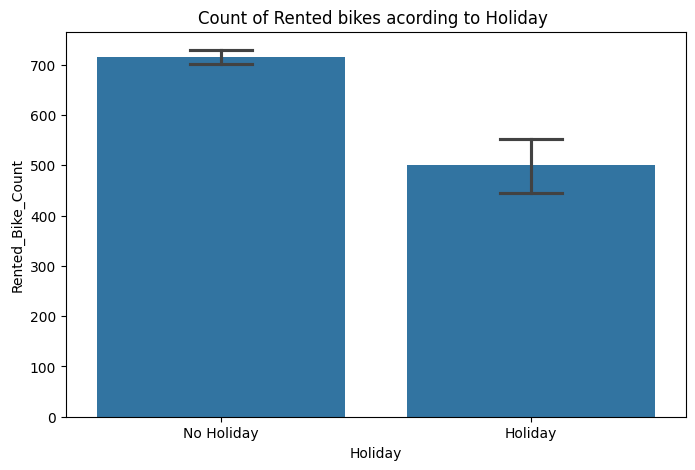

In [33]:
# Chart - 9 visualization code
# Analysis of data by vizualisation
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=bike_df, x='Holiday', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the count of most bookings made by the agent that's why I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

In the above bar plot which shows the use of rented bike is more on Non-holiday compare to holiday.

#### Chart - 10

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

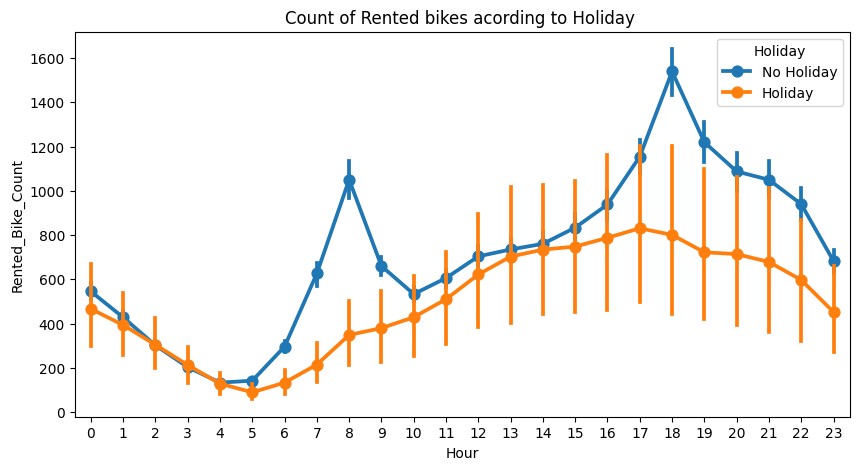

In [34]:
# Chart - 10 visualization code
# Analysis of data by vizualisation
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='Holiday', ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 1. Why did you pick the specific chart?

A point plot is a categorical plot that displays the mean value (or another statistical estimate) and confidence intervals for different categories. It is commonly used to compare the relationship between a categorical variable and a numeric variable across different groups or levels.

##### 2. What is/are the insight(s) found from the chart?

In the above point plot which shows the use of rented bike in a holiday, and it clearly shows that, in holiday people uses the rented bike from 2pm-8pm.

#### Chart - 11

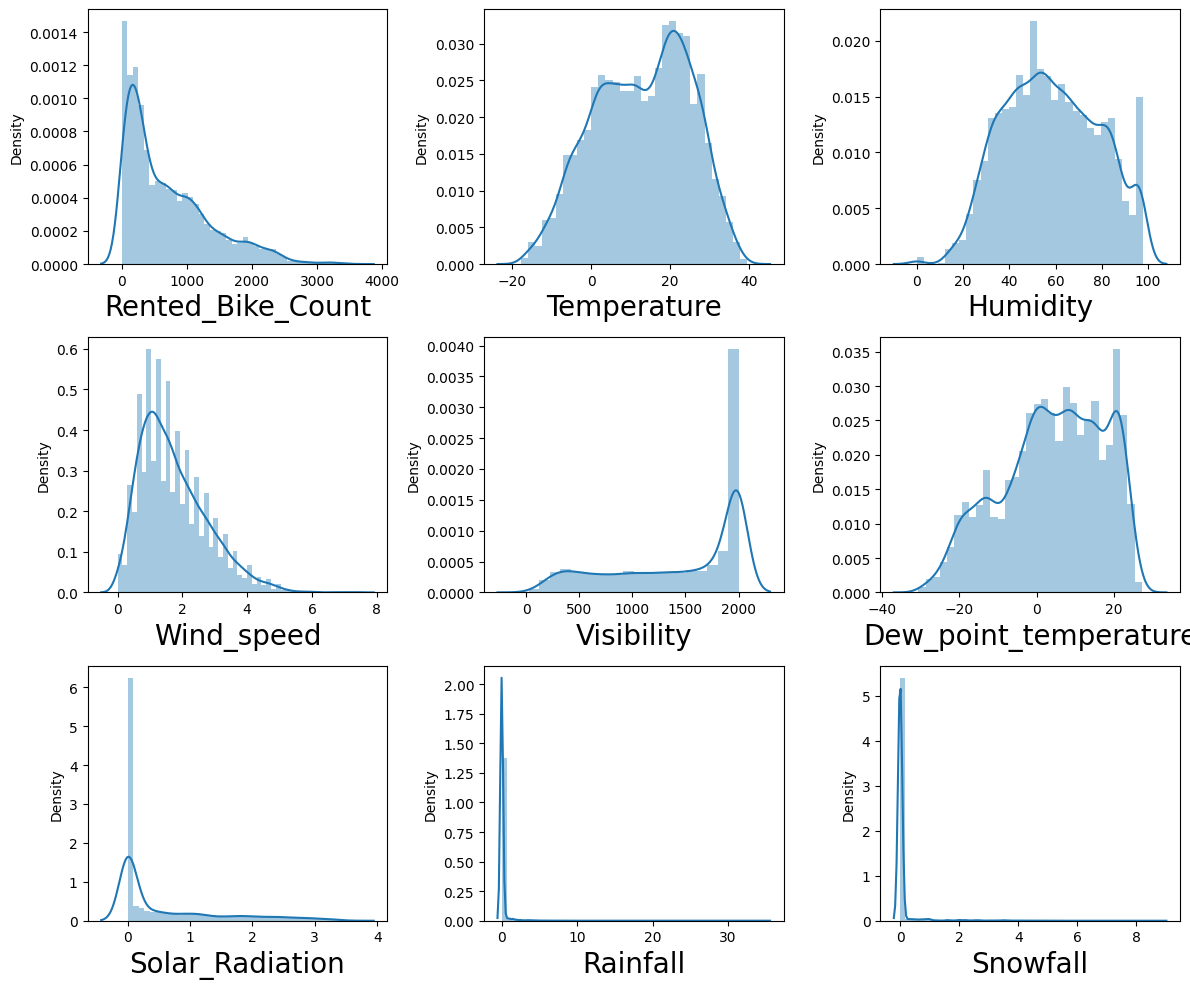

In [35]:
# Chart - 11 visualization code
# Analyze of Numerical variables distplots

# Assign the numerical column to variable
numerical_columns = list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

# Let's see how data is distributed for every column
plt.figure(figsize=(12,10))
plotnumber = 1

for column in numerical_features:
    if plotnumber <= 9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(bike_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Distplot is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

##### 2. What is/are the insight(s) found from the chart?

In the above distplot we can see that there are right skew and left skew are present in most of the columns.

#### Chart - 12

<Axes: xlabel='Temperature'>

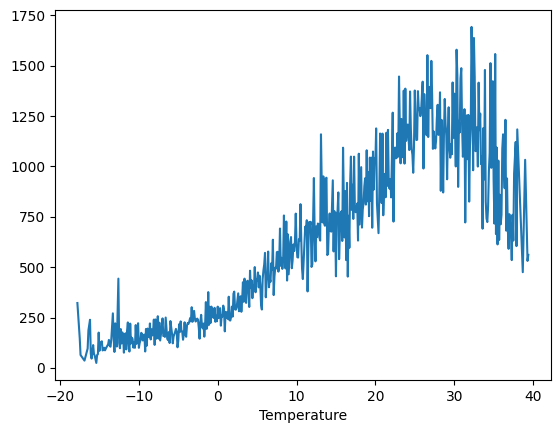

In [36]:
# Chart - 12 visualization code
# Numerical vs.Rented_Bike_Count

# Print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_df.groupby('Temperature')['Rented_Bike_Count'].mean().plot()

<Axes: xlabel='Dew_point_temperature'>

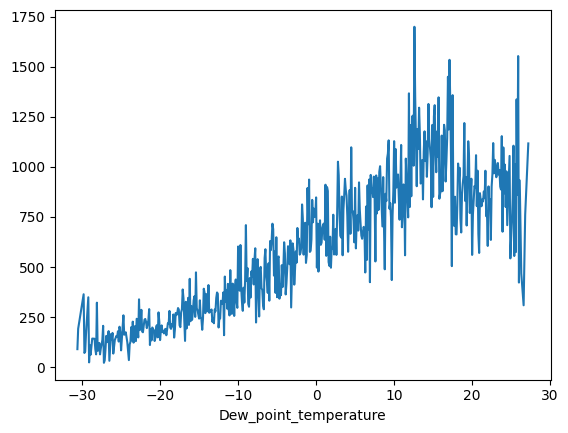

In [37]:
# Print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
bike_df.groupby('Dew_point_temperature')['Rented_Bike_Count'].mean().plot()

<Axes: xlabel='Solar_Radiation'>

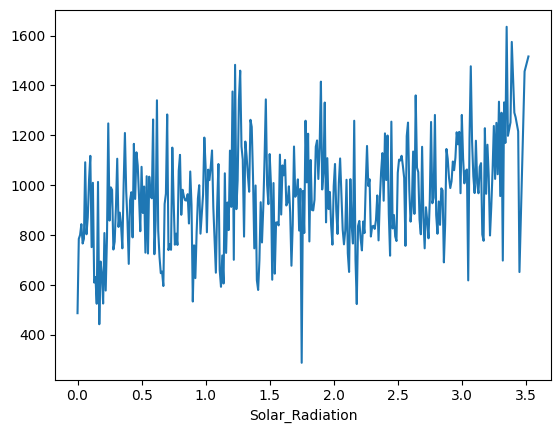

In [38]:
# Print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
bike_df.groupby('Solar_Radiation')['Rented_Bike_Count'].mean().plot()

<Axes: xlabel='Snowfall'>

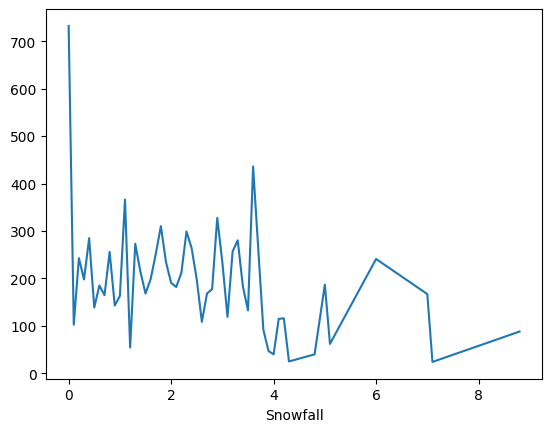

In [39]:
# Print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
bike_df.groupby('Snowfall')['Rented_Bike_Count'].mean().plot()

<Axes: xlabel='Rainfall'>

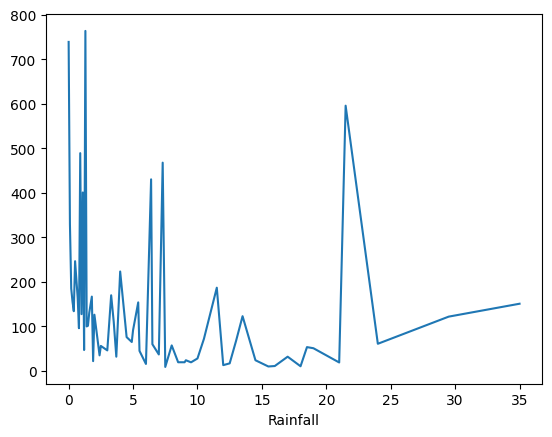

In [40]:
# Print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_df.groupby('Rainfall')['Rented_Bike_Count'].mean().plot()

<Axes: xlabel='Wind_speed'>

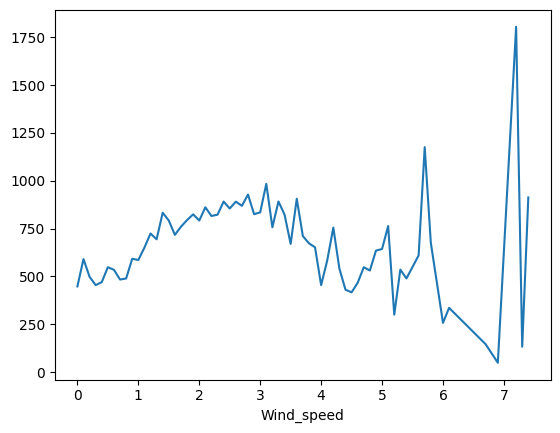

In [41]:
# Print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed')['Rented_Bike_Count'].mean().plot()

##### 1. Why did you pick the specific chart?

The plot() is used to draw points (markers) in a diagram. By default,
 the plot() draws a line from point to point. The function takes parameters for specifying points in the diagram.

##### 2. What is/are the insight(s) found from the chart?

From the above plots we see that,
* People like to ride bikes when it is pretty hot around 25°C in average.
* 'Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.
* The amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000.
* On the y-axis, the amount of rented bike is very low when we have more than 4 cm of snow, the bike rents is much lower.
* Even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes.
* Demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.


#### Chart - 13

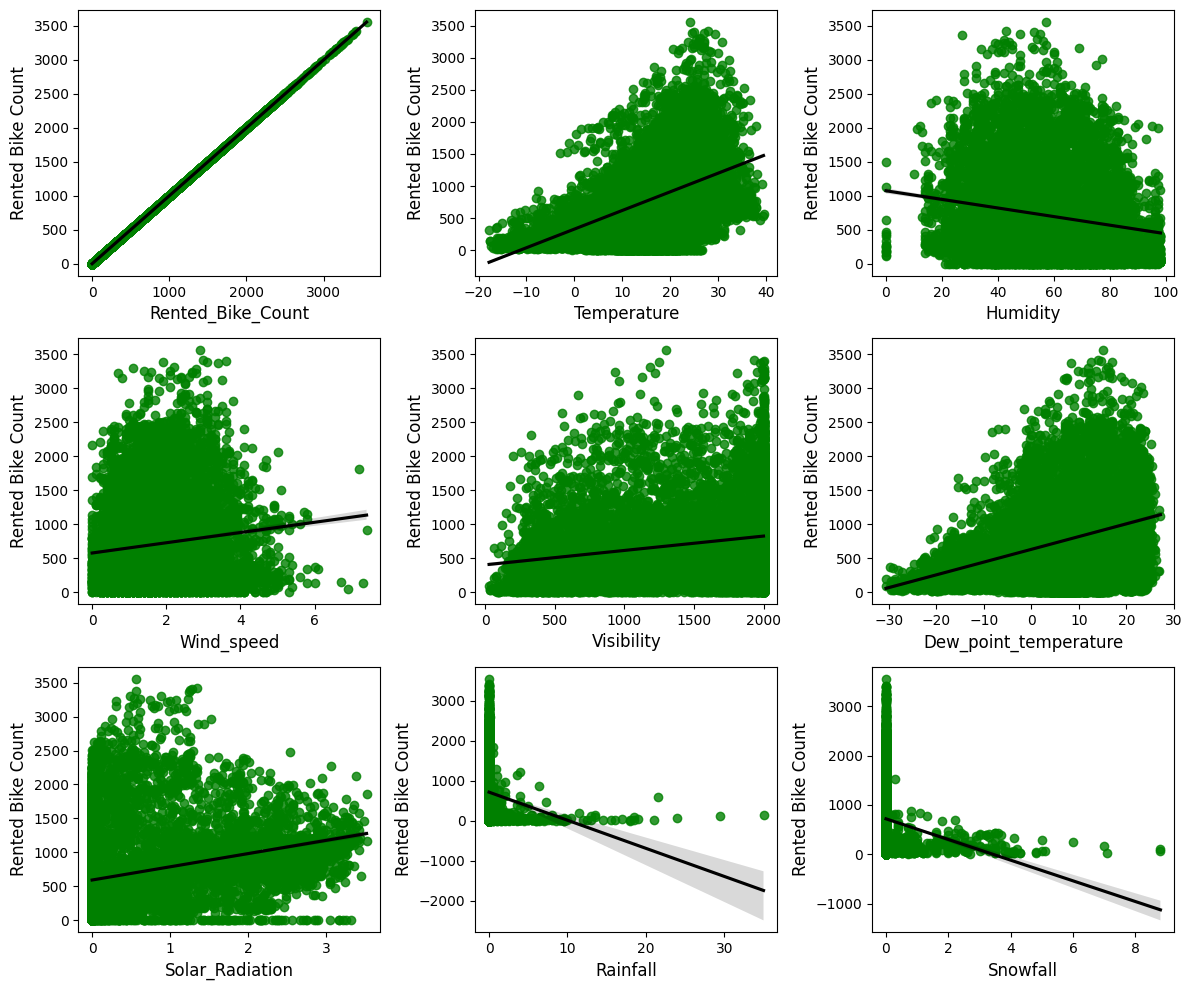

In [42]:
# Chart - 13 Visualization code
# Printing the regression plot for all the numerical features

# Let's see how data is distributed for every column
plotnumber = 1
plt.figure(figsize=(12,10))

for column in numerical_features:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.regplot(x=bike_df[column], y=bike_df['Rented_Bike_Count'], scatter_kws={"color": 'green'}, line_kws={"color": "black"})
        ax.set_xlabel(column, fontsize=12)
        ax.set_ylabel('Rented Bike Count', fontsize=12)
    plotnumber += 1

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Regplot used to create a scatter plot with a linear regression line fit to the data. It allows you to visualize the relationship between two variables and assess the strength and direction of their linear correlation. The regplot function can be used to perform simple linear regression analysis and visualize the resulting model.

##### 2. What is/are the insight(s) found from the chart?

From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.

Which means the rented bike count increases with increase of these features.

'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

#### Chart - 14

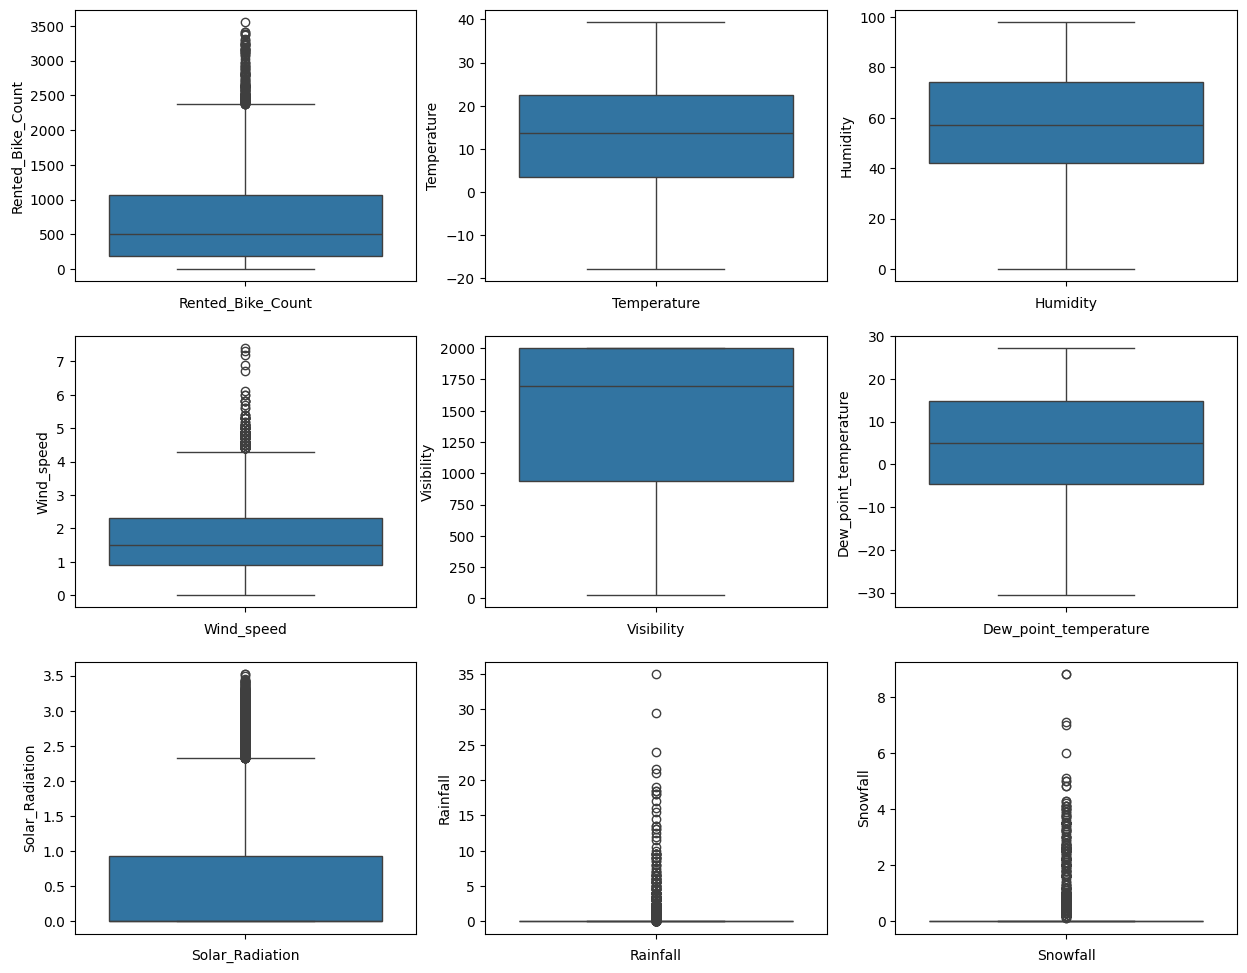

In [43]:
# Chart - 14 Visualization code
# Visualize the outliers using boxplot
plt.figure(figsize=(15,12))
graph = 1

for column in numerical_features:
    if graph <= 9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(bike_df[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot is used to create box and whisker plots. A boxplot is a visual representation of the distribution of a dataset, showing the median, quartiles, and any outliers.

##### 2. What is/are the insight(s) found from the chart?

In the above boxplot we can see that outliers are present in most of the columns like wind speed, solar radiation etc.

#### Chart - 15 - Correlation Heatmap

<Axes: >

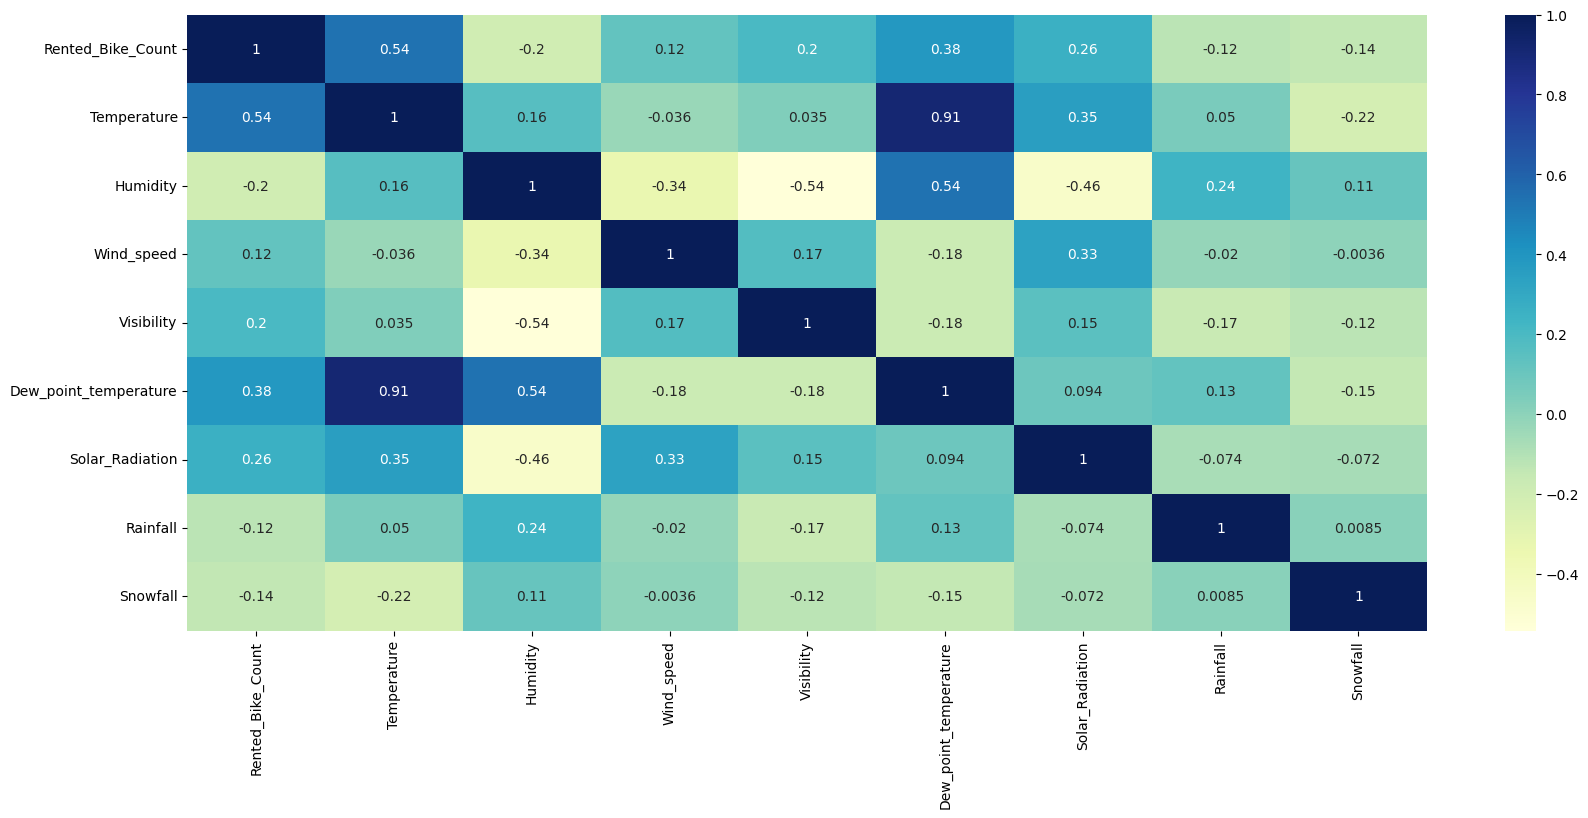

In [44]:
# Correlation Heatmap visualization code
# Plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation = bike_df.corr(numeric_only=True)
sns.heatmap((correlation), annot=True, cmap='YlGnBu')

##### 1. Why did you pick the specific chart?

The correlation heatmap chart is a great way to visualize correlations between multiple variables. It provides a clear and concise view of the relationships between the variables, which allows for easy and quick analysis. Additionally, the color coding used in the heatmap helps to quickly and easily identify correlations that may otherwise not be as apparent.

##### 2. What is/are the insight(s) found from the chart?

We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :

* Temperature
* Dew point temperature
* Solar radiation

And most negatively correlated variables are:

* Humidity
* Rainfall
* Snowfall

From the above correlation heatmap, We see that there is a positive
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.

### Feature Engineering & Data Pre-processing

#### 1. Handling Missing Values

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
weekdays_weekend         0
dtype: int64


<Axes: >

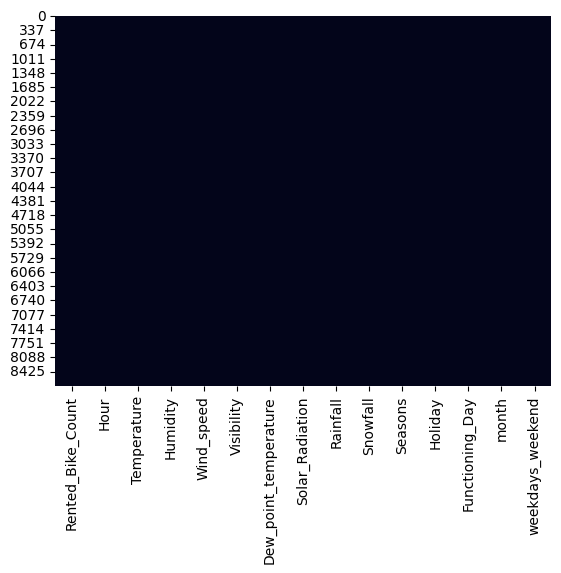

In [46]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(bike_df.isnull(), cbar=False)

* There are no missing values to handle in the given dataset.**

#### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments

# Remove outliers using zscore.
from scipy.stats import zscore

z_score = zscore(bike_df[numerical_features])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

bike_df = bike_df[filtering_entry]

* I have used z_score technique to treat outliers.
* The z-score technique is used to treat outliers because it provides a standardized way to identify and handle data points that deviate significantly from the mean of a distribution.

#### 3. Categorical Encoding

In [48]:
# Encode your categorical columns

# Assign all catagoriacla features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

# Creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,True,False
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,True,...,False,False,False,False,False,False,False,False,True,False
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,True,False
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,True,False
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,True,False


* I have used One_hot_encoding technique for categorical data conversion.
* One hot encoding is used to represent categorical variables numerically in a format that is suitable for machine learning algorithms. It is a popular technique for handling categorical data because many machine learning algorithms are designed to work with numerical data rather than categorical data.

### Feature Manipulation & Selection

#### 1. Feature Scalling

In [50]:
# Split data into x and y
y = bike_df_copy['Rented_Bike_Count']
X = bike_df_copy.drop(columns='Rented_Bike_Count', axis=1)

# Feature Scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_scaled.shape[1]

48

* I have used standard scaler technique for data scaling.
* Standard scaling technique is used to promote better analysis, enhance model performance, and ensure consistent and meaningful comparisons among variables in various statistical and machine learning tasks.

#### 2. Feature Selection using VIF

In [53]:
# Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif_score"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

# Let's check the values
vif

,vif_score,Features
0,100.161597,Temperature
1,21.098083,Humidity
2,1.458851,Wind_speed
3,2.274101,Visibility
4,129.424357,Dew_point_temperature
5,4.849106,Solar_Radiation
6,1.201122,Rainfall
7,1.202997,Snowfall
8,1.917163,Hour_1
9,1.918197,Hour_2


In [54]:
# Drop the Dew point temperature column
bike_df_copy = bike_df_copy.drop(['Dew_point_temperature'],axis=1)

* I have used Correlation heatmat (corr) and VIF method for feature selection.
* A correlation heatmap (corr) is used to visualize the correlation between different variables in a dataset. It is a graphical representation of the correlation matrix, where each cell represents the correlation coefficient between two variables. The correlation coefficient indicates the strength and direction of the linear relationship between two variables.
* VIF (Variance Inflation Factor) is used to measure multicollinearity in regression analysis. Multicollinearity occurs when there is a high correlation between two or more predictor variables in a regression model, which can lead to issues in the interpretation of the model and unstable coefficient estimates.

We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :

Temperature
Dew point temperature
Solar radiation
And most negatively correlated variables are:

Humidity
Rainfall
From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.

### Data Train-Test Split

In [55]:
# Split your data to train and test. Choose Splitting ratio wisely.

 # Split into 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

# Describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5799, 48)
Number transactions y_train dataset:  (5799,)
Number transactions X_test dataset:  (2486, 48)
Number transactions y_test dataset:  (2486,)


* I have split the data in 70-30 % ratio in train-test.
* The 70-30 ratio for train-test split is a commonly used practice in machine learning and data analysis, although it is not a hard rule and can vary depending on the specific problem and dataset. The 70% of the data is typically allocated to the training set, while the remaining 30% is allocated to the test set.

### ML Model Implementation

In [56]:
# Fit the Algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

# Check the score
reg.score(X_train, y_train)

0.7058169054815664

In [58]:
# Get the X_train and X-test value
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [59]:
print("\n================Train Result==========================")

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# Calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

# Calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

# Calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Linear Regression',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])


================Train Result==========================
MSE : 112324.70105871778
RMSE : 335.14877451471875
MAE : 256.45623509626813
R2 : 0.7058169054815664
Adjusted R2 : 0.7000225728853888


In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("\n=================Test Result==========================")

# Calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

# Calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

# Calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

# Calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

# Storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear Regression',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])


=================Test Result==========================
MSE : 111154.82054620847
RMSE : 333.39889103926015
MAE : 257.92174241339313
R2 : 0.7078415008240629
Adjusted R2 : 0.7020870453622472


In [61]:
# Visualizing evaluation Metric Score chart
print(training_df)
print(test_df)

               Model      MAE         MSE     RMSE  R2_score  Adjusted R2
1  Linear Regression  256.456  112324.701  335.149     0.706          0.7
               Model      MAE         MSE     RMSE  R2_score  Adjusted R2
1  Linear Regression  257.922  111154.821  333.399     0.708          0.7
